## Stock Price Prediction Project

The goal of this project is to predict future stock prices based on historical data using time-series techniques like LSTM (Long Short-Term Memory).

## 1. Data Collection

In [1]:
!pip3 install yfinance

In [2]:
#importing yahoo finance library for extracting data source
import yfinance as yf

#microsoft
ticker_symbol = 'MSFT'

df = yf.download(ticker_symbol)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400


In [3]:
df.shape

(9628, 6)

In [4]:
#to check for null values
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df = df.reset_index()

In [6]:
df.shape

(9628, 7)

## 2. Data preprocessing

In [7]:
#import the necessary library
from sklearn.preprocessing import MinMaxScaler

In [8]:
import pandas as pd

scaler = MinMaxScaler()

#to sepaprate Date column from others
date_col = df['Date']
num_col = df.drop(columns = ['Date'])

df1 = pd.DataFrame(scaler.fit_transform(num_col), columns = num_col.columns)

df1 = pd.concat([date_col, df1], axis = 1)
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.000000,0.000022,0.000000,0.000016,0.000010,1.000000
1,1986-03-14,0.000020,0.000024,0.000020,0.000024,0.000015,0.297096
2,1986-03-17,0.000028,0.000026,0.000028,0.000028,0.000017,0.127119
3,1986-03-18,0.000032,0.000026,0.000024,0.000022,0.000014,0.063588
4,1986-03-19,0.000026,0.000020,0.000020,0.000018,0.000011,0.044285
...,...,...,...,...,...,...,...
9623,2024-05-20,0.970523,0.984245,0.983211,0.987966,0.987966,0.013568
9624,2024-05-21,0.985816,0.998547,0.994591,0.996562,0.996562,0.018601
9625,2024-05-22,0.993347,0.997255,0.999930,1.000000,1.000000,0.015318
9626,2024-05-23,1.000000,1.000000,0.995926,0.991822,0.991823,0.014481


In [9]:
df = df1[['Date','Open','High','Low','Close','Volume']]

In [10]:
df

,Date,Open,High,Low,Close,Volume
0,1986-03-13,0.000000,0.000022,0.000000,0.000016,1.000000
1,1986-03-14,0.000020,0.000024,0.000020,0.000024,0.297096
2,1986-03-17,0.000028,0.000026,0.000028,0.000028,0.127119
3,1986-03-18,0.000032,0.000026,0.000024,0.000022,0.063588
4,1986-03-19,0.000026,0.000020,0.000020,0.000018,0.044285
...,...,...,...,...,...,...
9623,2024-05-20,0.970523,0.984245,0.983211,0.987966,0.013568
9624,2024-05-21,0.985816,0.998547,0.994591,0.996562,0.018601
9625,2024-05-22,0.993347,0.997255,0.999930,1.000000,0.015318
9626,2024-05-23,1.000000,1.000000,0.995926,0.991822,0.014481


In [11]:
#to improve accuracy of our model, we add rolling averages to columns
#SMA - Simple Moving Average for a rolling window of 20 days
df['SMA_20'] = df['Close'].rolling(window=20).mean()

#EMA - Exponential Moving Average for a window of 20 days
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,SMA_20,EMA_20
0,1986-03-13,0.000000,0.000022,0.000000,0.000016,1.000000,NaN,0.000016
1,1986-03-14,0.000020,0.000024,0.000020,0.000024,0.297096,NaN,0.000017
2,1986-03-17,0.000028,0.000026,0.000028,0.000028,0.127119,NaN,0.000018
3,1986-03-18,0.000032,0.000026,0.000024,0.000022,0.063588,NaN,0.000018
4,1986-03-19,0.000026,0.000020,0.000020,0.000018,0.044285,NaN,0.000018


In [13]:
df.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
SMA_20    19
EMA_20     0
dtype: int64

In [14]:
#drop all rows having null
df = df.dropna()

In [15]:
df.shape

(9609, 8)

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,SMA_20,EMA_20
19,1986-04-10,0.000020,0.000016,0.000016,0.000018,0.011246,0.000014,0.000014
20,1986-04-11,0.000024,0.000022,0.000024,0.000022,0.014491,0.000014,0.000014
21,1986-04-14,0.000026,0.000022,0.000026,0.000024,0.009568,0.000014,0.000015
22,1986-04-15,0.000028,0.000020,0.000020,0.000024,0.006798,0.000014,0.000016
23,1986-04-16,0.000028,0.000030,0.000026,0.000032,0.028758,0.000014,0.000018


In [17]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
SMA_20    0
EMA_20    0
dtype: int64

## 3. Exploratory Data Analysis (EDA)

In [18]:
import matplotlib.pyplot as plt

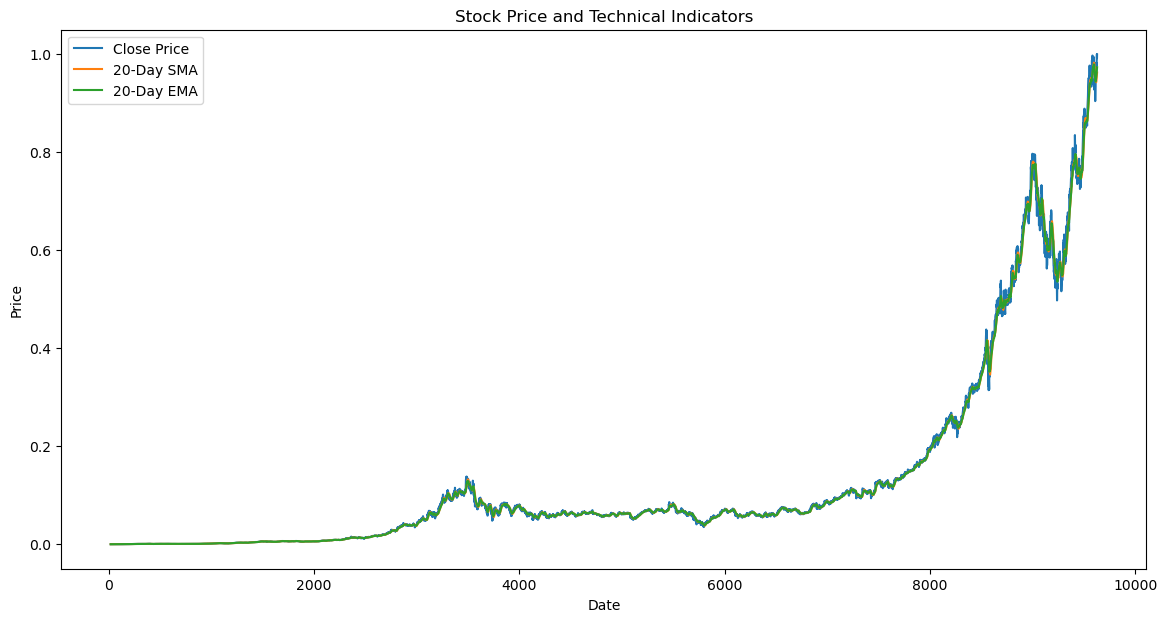

In [19]:
# Plot historical closing prices
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='20-Day SMA')
plt.plot(df['EMA_20'], label='20-Day EMA')
plt.title('Stock Price and Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 4. Prediction Model - 1

In [20]:
#define feature and target variable
X = df[['Open','High','Low','Volume','SMA_20','EMA_20']]
y = df['Close']

In [21]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7687, 6)
(1922, 6)
(7687,)
(1922,)


In [23]:
#training the model
import xgboost as xgb

#Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 100, max_depth = 5, learning_rate = 0.1)

#Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
#make predictions on the test set
y_pred = xgb_model.predict(X_test)

#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {round(mse, 6)}')
print(f'R-squared score: {round(r2, 6)}')

Mean Squared Error: 1.2e-05
R-squared score: 0.999734


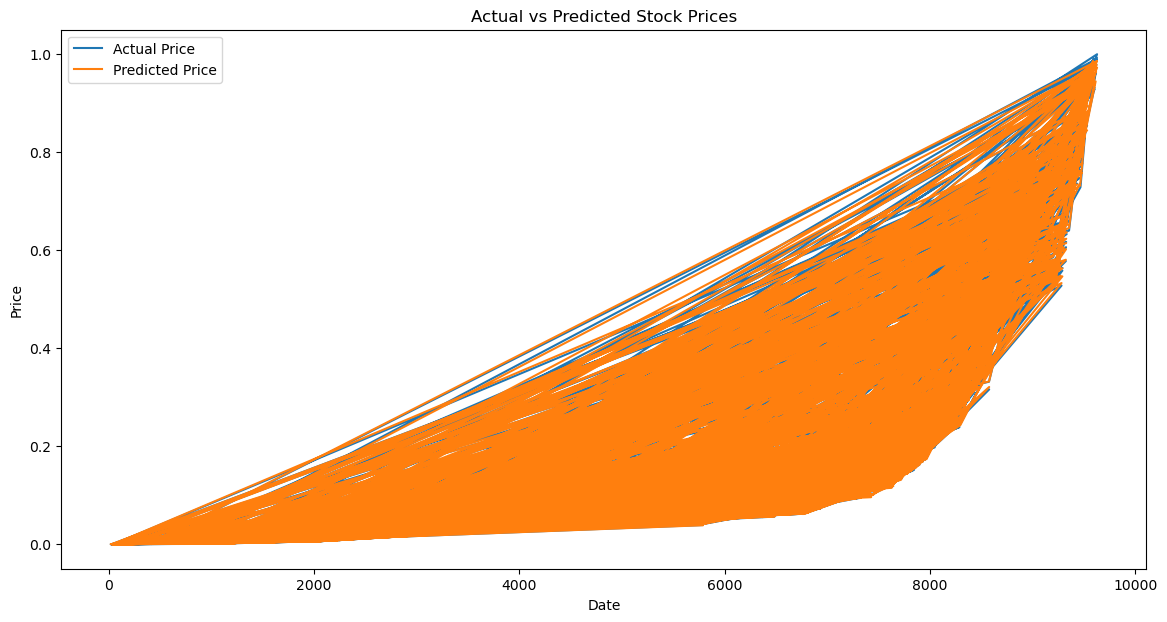

In [25]:
#Plotting actual vs predicted scores
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 5. Hyperparameter Tuning - 1

In [26]:
#grid search
from sklearn.model_selection import GridSearchCV

#define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.10]
}

In [27]:
#initialize the xgboost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

#grid search with cross-validation
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error', verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [28]:
#extract results from the grid search
results = grid_search.cv_results_

In [29]:
#to display the results in the form of a dataframe
results_list = []

In [30]:
#append the results to the dataframe
i=1
for mean_score, params in zip(results['mean_test_score'], results['params']):
    #neg to pos mse
    mse = -mean_score
    model = xgb.XGBRegressor(objective='reg:squarederror', **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results_list.append({
        'model_no': i,
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'learning_rate': params['learning_rate'],
        'mse': mse,
        'r2_score': r2
    })
    i += 1

In [31]:
results_df = pd.DataFrame(results_list)

In [32]:
results_df

,model_no,n_estimators,max_depth,learning_rate,mse,r2_score
0,1,50,3,0.01,0.014791,0.624674
1,2,100,3,0.01,0.005547,0.858905
2,3,200,3,0.01,0.000794,0.979648
3,4,50,5,0.01,0.014652,0.628828
4,5,100,5,0.01,0.005442,0.861900
5,6,200,5,0.01,0.000762,0.980661
6,7,50,7,0.01,0.014647,0.629005
7,8,100,7,0.01,0.005439,0.862030
8,9,200,7,0.01,0.000761,0.980686
9,10,50,3,0.05,0.000279,0.992810


In [33]:
#to select the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
#we create a condition that chooses the model number of the best parameters
best_params_condition = [results_df[col] == val for col, val in best_params.items()]

#we combine these conditions
comb_condition = best_params_condition[0]
for cond in best_params_condition[1:]:
    comb_condition &= cond
    
#we locate the model number
res_df = results_df[comb_condition]
des_val = res_df['model_no']
print(f'Model number: {des_val.iloc[-1]}')
print(f'Best Parameters: {best_params}')

Model number: 12
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [34]:
#best model's performance
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model's MSE: {round(mse_best, 6)}")
print(f"Best Model's R-squared value: {round(r2_best, 6)}")

Best Model's MSE: 1.2e-05
Best Model's R-squared value: 0.999738


## 6. Model plotting - 1

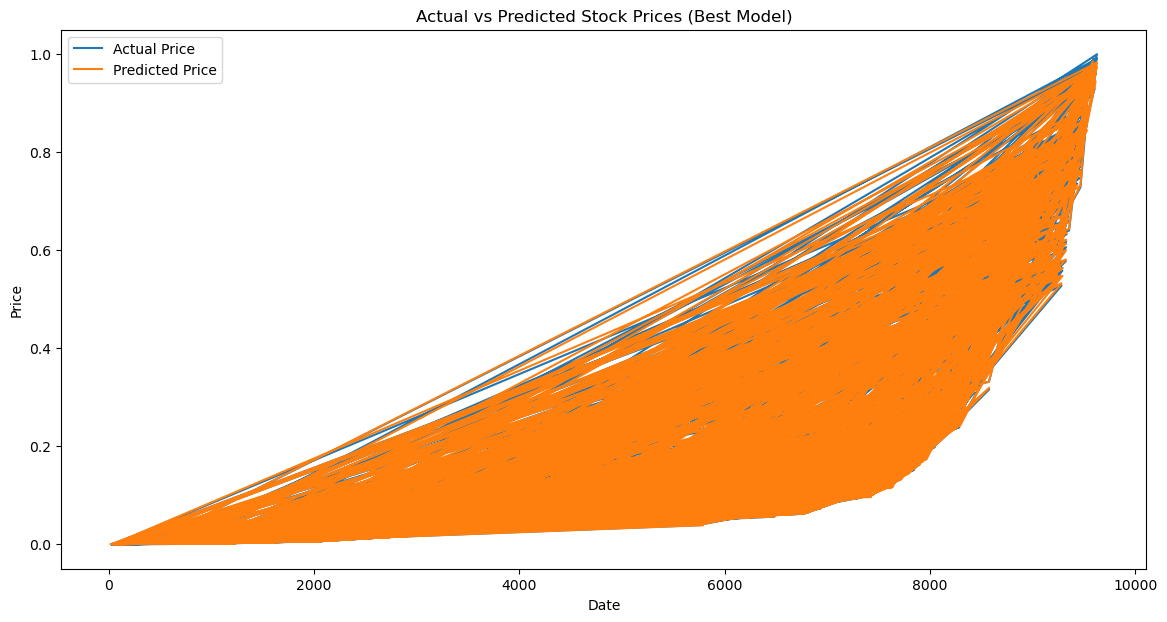

In [35]:
# Plot actual vs predicted prices for the best model
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred_best, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices (Best Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 7. Prediction model - 2

In [36]:
!pip3 install keras==2.12.0

In [37]:
#import the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

2024-05-24 17:11:12.566947: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 8. Hyperparameter Tuning - 2

In [38]:
# Define the neural network model
def create_model(optimizer='adam', neurons=32, activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='linear'))
    
    if optimizer == 'adam':
        optimizer_instance = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    elif optimizer == 'rmsprop':
        optimizer_instance = tf.keras.optimizers.RMSprop(learning_rate = learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")
    
    model.compile(optimizer=optimizer_instance, loss='mean_squared_error')
    return model

In [39]:
# Create a KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

/var/folders/gq/p1y6xkh16d7ch125tmwm23nr0000gn/T/ipykernel_2065/1994533151.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


In [40]:
# Define the parameter grid
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': ['relu', 'tanh']
}

In [41]:
# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv = 3, verbose = 3, error_score = 'raise')
try:
    grid_result = grid.fit(X_train, y_train)
except Exception as e:
    print(f"An error has occured: {e}")
    raise

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END activation=relu, batch_size=16, epochs=50, learning_rate=0.001, neurons=32, optimizer=adam;, score=-0.000 total time=  15.0s
[CV 2/3] END activation=relu, batch_size=16, epochs=50, learning_rate=0.001, neurons=32, optimizer=adam;, score=-0.000 total time=  13.8s
[CV 3/3] END activation=relu, batch_size=16, epochs=50, learning_rate=0.001, neurons=32, optimizer=adam;, score=-0.000 total time=  13.4s
[CV 1/3] END activation=relu, batch_size=16, epochs=50, learning_rate=0.001, neurons=32, optimizer=rmsprop;, score=-0.000 total time=  12.6s
[CV 2/3] END activation=relu, batch_size=16, epochs=50, learning_rate=0.001, neurons=32, optimizer=rmsprop;, score=-0.000 total time=  12.9s
[CV 3/3] END activation=relu, batch_size=16, epochs=50, learning_rate=0.001, neurons=32, optimizer=rmsprop;, score=-0.000 total time=  12.9s
[CV 1/3] END activation=relu, batch_size=16, epochs=50, learning_rate=0.001, neurons=64, optimizer=a

In [42]:
results = grid_result.cv_results_

In [43]:
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_batch_size', 'param_epochs', 'param_learning_rate', 'param_neurons', 'param_optimizer', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [44]:
results_list = []

In [45]:
# Populate the results list
k = 1
for i in range(len(results['params'])):
    params = results['params'][i]
    mse = -results['mean_test_score'][i]
    
    # Re-fit the model with the current parameters to get the r2 score on the test set
    model = create_model(optimizer=params['optimizer'], neurons=params['neurons'], activation=params['activation'], learning_rate=params['learning_rate'])
    model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    results_list.append({
        'model_no': k,
        'batch_size': params['batch_size'],
        'epochs': params['epochs'],
        'optimizer': params['optimizer'],
        'neurons': params['neurons'],
        'learning_rate': params['learning_rate'],
        'activation': params['activation'],
        'mse': mse,
        'r2_score': r2
    })
    k += 1

61/61 [==============================] - 0s 769us/step


In [46]:
# Convert the list to a DataFrame
results_df = pd.DataFrame(results_list)

In [47]:
results_df

,model_no,batch_size,epochs,optimizer,neurons,learning_rate,activation,mse,r2_score
0,1,16,50,adam,32,0.001,relu,0.000005,0.999905
1,2,16,50,rmsprop,32,0.001,relu,0.000009,0.999475
2,3,16,50,adam,64,0.001,relu,0.000011,0.999450
3,4,16,50,rmsprop,64,0.001,relu,0.000010,0.998830
4,5,16,50,adam,128,0.001,relu,0.000013,0.999900
...,...,...,...,...,...,...,...,...,...
211,212,64,100,rmsprop,32,0.100,tanh,1.837025,-30.154076
212,213,64,100,adam,64,0.100,tanh,0.071008,-1.077279
213,214,64,100,rmsprop,64,0.100,tanh,7.580247,-772.309017
214,215,64,100,adam,128,0.100,tanh,0.235282,-0.038929


In [48]:
# Best parameters and model performance
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

#we create a condition that chooses the model number of the best parameters
best_params_condition = [results_df[col] == val for col, val in best_params.items()]

#we combine these conditions
comb_condition = best_params_condition[0]
for cond in best_params_condition[1:]:
    comb_condition &= cond
    
#we locate the model number
res_df = results_df[comb_condition]
des_val = res_df['model_no']
print(f'Model number: {int(des_val.iloc[-1])}')
print(f'Best Parameters: {best_params}')

Model number: 57
Best Parameters: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'learning_rate': 0.001, 'neurons': 64, 'optimizer': 'adam'}


In [49]:
# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Mean Squared Error: {round(mse_best, 6)}')
print(f'Best Model R² Score: {round(r2_best, 6)}')

Best Model Mean Squared Error: 4e-06
Best Model R² Score: 0.999917


## 9. Model Plotting - 2

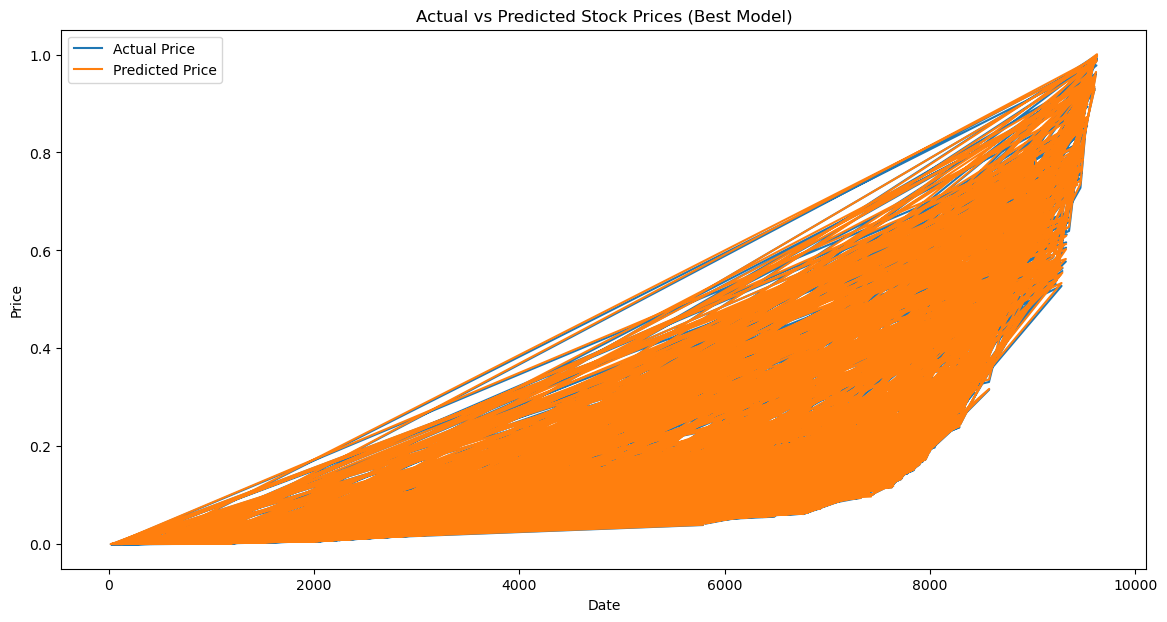

In [50]:
# Plot actual vs predicted prices for the best model
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred_best, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices (Best Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()